In [99]:
import pandas as pd
import numpy as np

In [100]:
cr = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Supervised\Feature Importance\CreditRisk.csv')

In [101]:
cr.head()

Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [102]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [103]:
cr.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [104]:
cr.Loan_Status.value_counts()

Y    712
N    269
Name: Loan_Status, dtype: int64

In [105]:
cr.Gender.fillna('Male', inplace= True)
cr.Married.fillna('No', inplace= True)
cr.Dependents.fillna(0.0, inplace= True)
cr.Self_Employed.fillna('No', inplace= True)
cr.LoanAmount.fillna(cr.LoanAmount.mean(), inplace= True)
cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean(), inplace= True)
cr.Credit_History.fillna(0, inplace= True)

In [106]:
cr.Gender.replace({'Female': 0, 'Male': 1}, inplace= True)
cr.Married.replace({'No': 0, 'Yes': 1}, inplace= True)
cr.Education.replace({'Not Graduate': 0, 'Graduate': 1}, inplace= True)
cr.Self_Employed.replace({'No': 0, 'Yes': 1}, inplace= True)
cr.Property_Area.replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2}, inplace= True)
cr.Loan_Status.replace({'N': 0, 'Y': 1}, inplace= True)

In [107]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    int64  
 2   Married            981 non-null    int64  
 3   Dependents         981 non-null    float64
 4   Education          981 non-null    int64  
 5   Self_Employed      981 non-null    int64  
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    int64  
 12  Loan_Status        981 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 99.8+ KB


In [108]:
cr1 = cr

In [109]:
cr = cr.drop(['Loan_ID'], axis=1)

In [110]:
cr.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0         0.0          1              0             5849   
1       1        1         1.0          1              0             4583   
2       1        1         0.0          1              1             3000   
3       1        1         0.0          0              0             2583   
4       1        0         0.0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0   142.51153             360.0             1.0   
1             1508.0   128.00000             360.0             1.0   
2                0.0    66.00000             360.0             1.0   
3             2358.0   120.00000             360.0             1.0   
4                0.0   141.00000             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2            1  
3              2            1  
4              2            1

# 1. Boruta

In [111]:
cr_x = cr.iloc[:, 0:-1]
cr_y = cr.iloc[:,-1]

In [52]:
# Boruta cannot do prediction and hence no need for sampling
# Boruta is a wrapper on random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()

In [55]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [56]:
from boruta import BorutaPy

In [57]:
type(cr_x)

pandas.core.frame.DataFrame

In [58]:
# For Boruta we need to convert data into array

In [59]:
cr_x1 = cr_x.copy()

# Just for backup

In [60]:
cr_x = np.array(cr_x)
cr_y = np.array(cr_y)

In [70]:
boruta_feat_sel_cr = BorutaPy(rf, max_iter= 100, verbose= 2)

# verbose give output after every iteration
# if yuo remove verbose, the below code will run the iteration and will only give the final output

In [71]:
# At the starting( when boruta starts)
# There are 11 x variables and  so tentative is shown 11 and rest 0
# After Boruta runs multiople times, it can stop before its specified iteration, but will give tentative 0
# Confirmed (significant variable) value and Rejected(non-significant variable) value

In [72]:
boruta_feat_sel_cr.fit(cr_x, cr_y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	8
Iteration:

BorutaPy(estimator=RandomForestClassifier(n_estimators=1000,
                                          random_state=RandomState(MT19937) at 0x23DACD8E540),
         random_state=RandomState(MT19937) at 0x23DACD8E540, verbose=2)

In [73]:
boruta_feat_sel_cr.support_

array([False, False, False, False, False,  True, False, False, False,
        True, False])

In [74]:
fea_imp = pd.DataFrame({'Feature': cr_x1.columns
                       , 'Imp': boruta_feat_sel_cr.support_})
fea_imp

Feature    Imp
0              Gender  False
1             Married  False
2          Dependents  False
3           Education  False
4       Self_Employed  False
5     ApplicantIncome   True
6   CoapplicantIncome  False
7          LoanAmount  False
8    Loan_Amount_Term  False
9      Credit_History   True
10      Property_Area  False

In [69]:
# We get the list of important features, but which one is more significant, cannot be judged
# Boruta gives very good results

# 2. RFE - Recursive Feature Elimination

In [75]:
# pip install RFE

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement RFE (from versions: none)
ERROR: No matching distribution found for RFE


In [112]:
from sklearn.feature_selection import RFE

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
dt = DecisionTreeClassifier()

In [116]:
rfe_cr = RFE(dt, n_features_to_select= 1)

In [117]:
rfe_cr.fit(cr_x, cr_y)

# Here we want cr_x and cr_y in Dataframe format unlike array format in Boruta

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1)

In [118]:
rfe_cr.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False])

In [119]:
fea_imp = pd.DataFrame({'Feature': cr_x1.columns
                       , 'Imp': rfe_cr.support_})
fea_imp

Feature    Imp
0              Gender  False
1             Married  False
2          Dependents  False
3           Education  False
4       Self_Employed  False
5     ApplicantIncome   True
6   CoapplicantIncome  False
7          LoanAmount  False
8    Loan_Amount_Term  False
9      Credit_History  False
10      Property_Area  False

In [120]:
# From Above we see only one feature importance that is Applicantincome
# The reason is we selected n_features_to_select= 1 in RFE
# This also implies that Applicantincome is the most important feature, which Boruta cannot tell


In [122]:
# Now we will put n_features_to_select= 2 to get 2 important features
rfe_cr = RFE(dt, n_features_to_select= 2)

In [123]:
rfe_cr.fit(cr_x, cr_y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=2)

In [124]:
fea_imp = pd.DataFrame({'Feature': cr_x1.columns
                       , 'Imp': rfe_cr.support_})
fea_imp

Feature    Imp
0              Gender  False
1             Married  False
2          Dependents  False
3           Education  False
4       Self_Employed  False
5     ApplicantIncome   True
6   CoapplicantIncome  False
7          LoanAmount   True
8    Loan_Amount_Term  False
9      Credit_History  False
10      Property_Area  False

In [125]:
# Now I get 2 important features ApplicantIncome and LoanAmount
# But LoanAmount is the 2nd most important feature

In [126]:
# Now we will put n_features_to_select= 3 to get 3 important features
rfe_cr = RFE(dt, n_features_to_select= 3)

In [127]:
rfe_cr.fit(cr_x, cr_y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)

In [128]:
fea_imp = pd.DataFrame({'Feature': cr_x1.columns
                       , 'Imp': rfe_cr.support_})
fea_imp

Feature    Imp
0              Gender  False
1             Married  False
2          Dependents  False
3           Education  False
4       Self_Employed  False
5     ApplicantIncome   True
6   CoapplicantIncome  False
7          LoanAmount   True
8    Loan_Amount_Term  False
9      Credit_History   True
10      Property_Area  False

In [129]:
# Similarly Credit_History is the 3rd important feature

# CHI Square and Annova

In [130]:
# Ho in Chi square ( no relationship between two variables)
# Ho in Annova (Mean/Variance is same for 2 or more variables or sample)
# Both are Right tailed test


In [131]:
# Ho in Chi square ( no relationship between two variables)
# Out of these 2 variables one is Y and another is X variable
# So Ho will be: X is not significant/important variable, as no relatioship b/w two variable
# If null is rejected, then X is a sigificant variable as Y will depend on X


In [132]:
from scipy.stats import chi2_contingency

In [138]:
cr = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Supervised\Feature Importance\CreditRisk.csv')

In [139]:
cr = cr.iloc[:, 1::]

In [140]:
cr= cr.dropna()

In [141]:
cr.Gender.replace({'Female': 0, 'Male': 1}, inplace= True)
cr.Married.replace({'No': 0, 'Yes': 1}, inplace= True)
cr.Education.replace({'Not Graduate': 0, 'Graduate': 1}, inplace= True)
cr.Self_Employed.replace({'No': 0, 'Yes': 1}, inplace= True)
cr.Property_Area.replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2}, inplace= True)
cr.Loan_Status.replace({'N': 0, 'Y': 1}, inplace= True)

In [142]:
cr.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1         1.0          1              0             4583   
2       1        1         0.0          1              1             3000   
3       1        1         0.0          0              0             2583   
4       1        0         0.0          1              0             6000   
5       1        1         2.0          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area  Loan_Status  
1              0            0  
2              2            1  
3              2            1  
4              2            1  
5              2            1

In [143]:
edu_loanstatus = pd.crosstab(cr.Education, cr.Loan_Status)
edu_loanstatus

Loan_Status    0    1
Education            
0             53  109
1            155  452

In [144]:
chi2_contingency(edu_loanstatus)
# Return
# chi2 : float
    # The test statistic.
# p : float
   # The p-value of the test
# dof : int
   # Degrees of freedom
#expected : ndarray, same shape as `observed`
   # The expected frequencies, based on the marginal sums of the table.

(2.9874052827547284,
 0.083914528591103,
 1,
 array([[ 43.81794538, 118.18205462],
        [164.18205462, 442.81794538]]))

In [145]:
# Since, the p-value is 0.0839 which is greater than 0.05
# We fail to reject the null as it is a right tailed test

chi2_contingency(edu_loanstatus)[1]

0.083914528591103

In [148]:
for col in cr.columns[0:-1]:
    tab = pd.crosstab(cr[col], cr.Loan_Status)
    pvalue = chi2_contingency(tab)[1]
    if pvalue < 0.05:
        print('Pvalue is -->', pvalue)
        print('Since pvalue is less than 0.05, we reject the null')
        print(col, '--> is significant')
        print('--------------------------------------------------')
    else:
        print('Pvalue is -->', pvalue)
        print('Since pvalue is more than 0.05, we fail to reject the null')
        print(col, '--> is Not significant')
        print('--------------------------------------------------')

Pvalue is --> 0.19244004957244598
Since pvalue is more than 0.05, we fail to reject the null
Gender --> is Not significant
--------------------------------------------------
Pvalue is --> 0.001983379685810767
Since pvalue is less than 0.05, we reject the null
Married --> is significant
--------------------------------------------------
Pvalue is --> 0.4430755272160021
Since pvalue is more than 0.05, we fail to reject the null
Dependents --> is Not significant
--------------------------------------------------
Pvalue is --> 0.083914528591103
Since pvalue is more than 0.05, we fail to reject the null
Education --> is Not significant
--------------------------------------------------
Pvalue is --> 0.8063117483346236
Since pvalue is more than 0.05, we fail to reject the null
Self_Employed --> is Not significant
--------------------------------------------------
Pvalue is --> 0.42865964699284553
Since pvalue is more than 0.05, we fail to reject the null
ApplicantIncome --> is Not significan

In [149]:
feat_list = []
score_list = []
for col in cr.columns[0:-1]:
    tab = pd.crosstab(cr[col], cr.Loan_Status)
    pvalue = chi2_contingency(tab)[1]
    if pvalue < 0.05:
        print('Pvalue is -->', pvalue)
        print('Since pvalue is less than 0.05, we reject the null')
        print(col, '--> is significant')
        print('--------------------------------------------------')
        feat_list.append(col)
        score_list.append(pvalue)
    else:
        print('Pvalue is -->', pvalue)
        print('Since pvalue is more than 0.05, we fail to reject the null')
        print(col, '--> is Not significant')
        print('--------------------------------------------------')

Pvalue is --> 0.19244004957244598
Since pvalue is more than 0.05, we fail to reject the null
Gender --> is Not significant
--------------------------------------------------
Pvalue is --> 0.001983379685810767
Since pvalue is less than 0.05, we reject the null
Married --> is significant
--------------------------------------------------
Pvalue is --> 0.4430755272160021
Since pvalue is more than 0.05, we fail to reject the null
Dependents --> is Not significant
--------------------------------------------------
Pvalue is --> 0.083914528591103
Since pvalue is more than 0.05, we fail to reject the null
Education --> is Not significant
--------------------------------------------------
Pvalue is --> 0.8063117483346236
Since pvalue is more than 0.05, we fail to reject the null
Self_Employed --> is Not significant
--------------------------------------------------
Pvalue is --> 0.42865964699284553
Since pvalue is more than 0.05, we fail to reject the null
ApplicantIncome --> is Not significan

In [150]:
feat_imp = pd.DataFrame({'Feature': feat_list, 'Importance': score_list})
feat_imp.sort_values('Importance', ascending= True)

Feature    Importance
2    Credit_History  8.355997e-67
3     Property_Area  1.594386e-03
0           Married  1.983380e-03
1  Loan_Amount_Term  1.320275e-02

In [151]:
# Lesser the p-value, higher is the importance

In [152]:
# Annova
# Ho in Annova (Mean/Variance is same for 2 or more variables or sample)
# Used when the X variable is numeric and continuous and should not be categorical
# ANOVA is used when one variable is numeric and one is categorical 
# Such as numerical input variables and a classification target variable.


In [159]:
db = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Supervised\Feature Importance\diabetes.csv')

In [160]:
db.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [163]:
# Converting into array
dataset = db.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [167]:
# split into input (X) and output (y) variables
X = dataset[:, :-1]
Y = dataset[:,-1]

In [165]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [168]:
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [180]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= .2)

In [187]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot


In [189]:
fstat = SelectKBest(score_func=f_classif, k='all')
 
# learn relationship from training data
fstat.fit(X_train, Y_train)
 
# transform train input data
X_train_fs = fstat.transform(X_train)
 
# transform test input data
X_test_fs = fstat.transform(X_test)


Feature 0: 31.112774
Feature 1: 166.565298
Feature 2: 3.033289
Feature 3: 5.758886
Feature 4: 17.620391
Feature 5: 57.799963
Feature 6: 20.944473
Feature 7: 38.910989


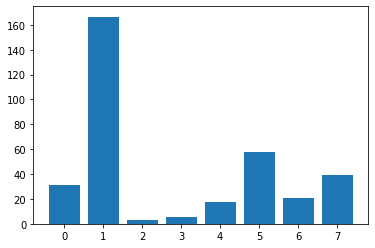

In [204]:
# Scores for the features
for i in range(len(fstat.scores_)):
    print('Feature %d: %f' % (i, fstat.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fstat.scores_))], fstat.scores_)
pyplot.show()

In [198]:
fstat_list = []
for i in range(len(fstat.scores_)):
    fstat_list.append(fstat.scores_[i])

In [199]:
fstat_list

[31.112774028233726,
 166.5652976319528,
 3.03328853231879,
 5.7588861974719086,
 17.62039135918551,
 57.799962945848826,
 20.94447279296501,
 38.9109886807005]

In [201]:
db_x = db.iloc[:, 0:-1]

In [203]:
feat_imp_annova = pd.DataFrame({'Feature': db_x.columns, 'Importance': fstat_list})
feat_imp_annova.sort_values('Importance', ascending= False)

Feature  Importance
1                   Glucose  166.565298
5                       BMI   57.799963
7                       Age   38.910989
0               Pregnancies   31.112774
6  DiabetesPedigreeFunction   20.944473
4                   Insulin   17.620391
3             SkinThickness    5.758886
2             BloodPressure    3.033289

In [205]:
# Glucose is the most important feature

In [207]:
# Another way or easier way for doing this Annova test

In [208]:
db = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Supervised\Feature Importance\diabetes.csv')

In [209]:
from scipy.stats import f_oneway

In [210]:
f_oneway(db.Glucose, db.Outcome)

F_onewayResult(statistic=10914.672630134193, pvalue=0.0)

In [211]:
f_oneway(db.BMI, db.Outcome)

F_onewayResult(statistic=12326.397968979043, pvalue=0.0)

In [212]:
f_oneway(db.BloodPressure, db.Outcome)

F_onewayResult(statistic=9685.068133631648, pvalue=0.0)

In [215]:
F_stat = []
P = []
for col in db.columns[0:-1]:
    fstat, pvalue = f_oneway(db[col], db.Outcome)
    F_stat.append(fstat)
    P.append(pvalue)

In [216]:
F_stat

[810.5150593469092,
 10914.672630134193,
 9685.068133631648,
 1228.8421887367274,
 365.01491713877726,
 12326.397968979043,
 34.40531346539221,
 5997.832961507344]

In [218]:
feat_imp_annova = pd.DataFrame({'Feature': db_x.columns, 'f-statistic': F_stat, 'p-value': P})
feat_imp_annova.sort_values('f-statistic', ascending= False)

Feature   f-statistic        p-value
5                       BMI  12326.397969   0.000000e+00
1                   Glucose  10914.672630   0.000000e+00
2             BloodPressure   9685.068134   0.000000e+00
7                       Age   5997.832962   0.000000e+00
3             SkinThickness   1228.842189  3.107939e-198
0               Pregnancies    810.515059  1.723648e-143
4                   Insulin    365.014917   3.653184e-73
6  DiabetesPedigreeFunction     34.405313   5.471444e-09

# LIME - Local Interpretable Model-agnostic Explanation

In [220]:
!pip install lime

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=b30bc1bc3cafd931cdd8200b228711380fd8b791b910f7f358c8a2fb168b05b2
  Stored in directory: c:\users\rahulk\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [221]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [304]:
cr = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Supervised\Feature Importance\CreditRisk.csv')

In [305]:
cr.head()

Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [306]:
cr = cr.drop(['Loan_ID'], axis=1)

In [307]:
cr= cr.dropna()

In [308]:
cr.Gender.replace({'Female': 0, 'Male': 1}, inplace= True)
cr.Married.replace({'No': 0, 'Yes': 1}, inplace= True)
cr.Education.replace({'Not Graduate': 0, 'Graduate': 1}, inplace= True)
cr.Self_Employed.replace({'No': 0, 'Yes': 1}, inplace= True)
cr.Property_Area.replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2}, inplace= True)
cr.Loan_Status.replace({'N': 0, 'Y': 1}, inplace= True)

In [309]:
cr.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1         1.0          1              0             4583   
2       1        1         0.0          1              1             3000   
3       1        1         0.0          0              0             2583   
4       1        0         0.0          1              0             6000   
5       1        1         2.0          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area  Loan_Status  
1              0            0  
2              2            1  
3              2            1  
4              2            1  
5              2            1

<AxesSubplot:>

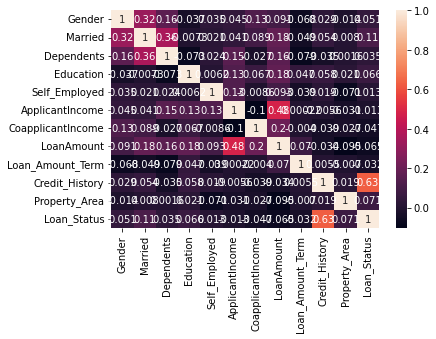

In [310]:
sns.heatmap(cr.corr(), annot= True)

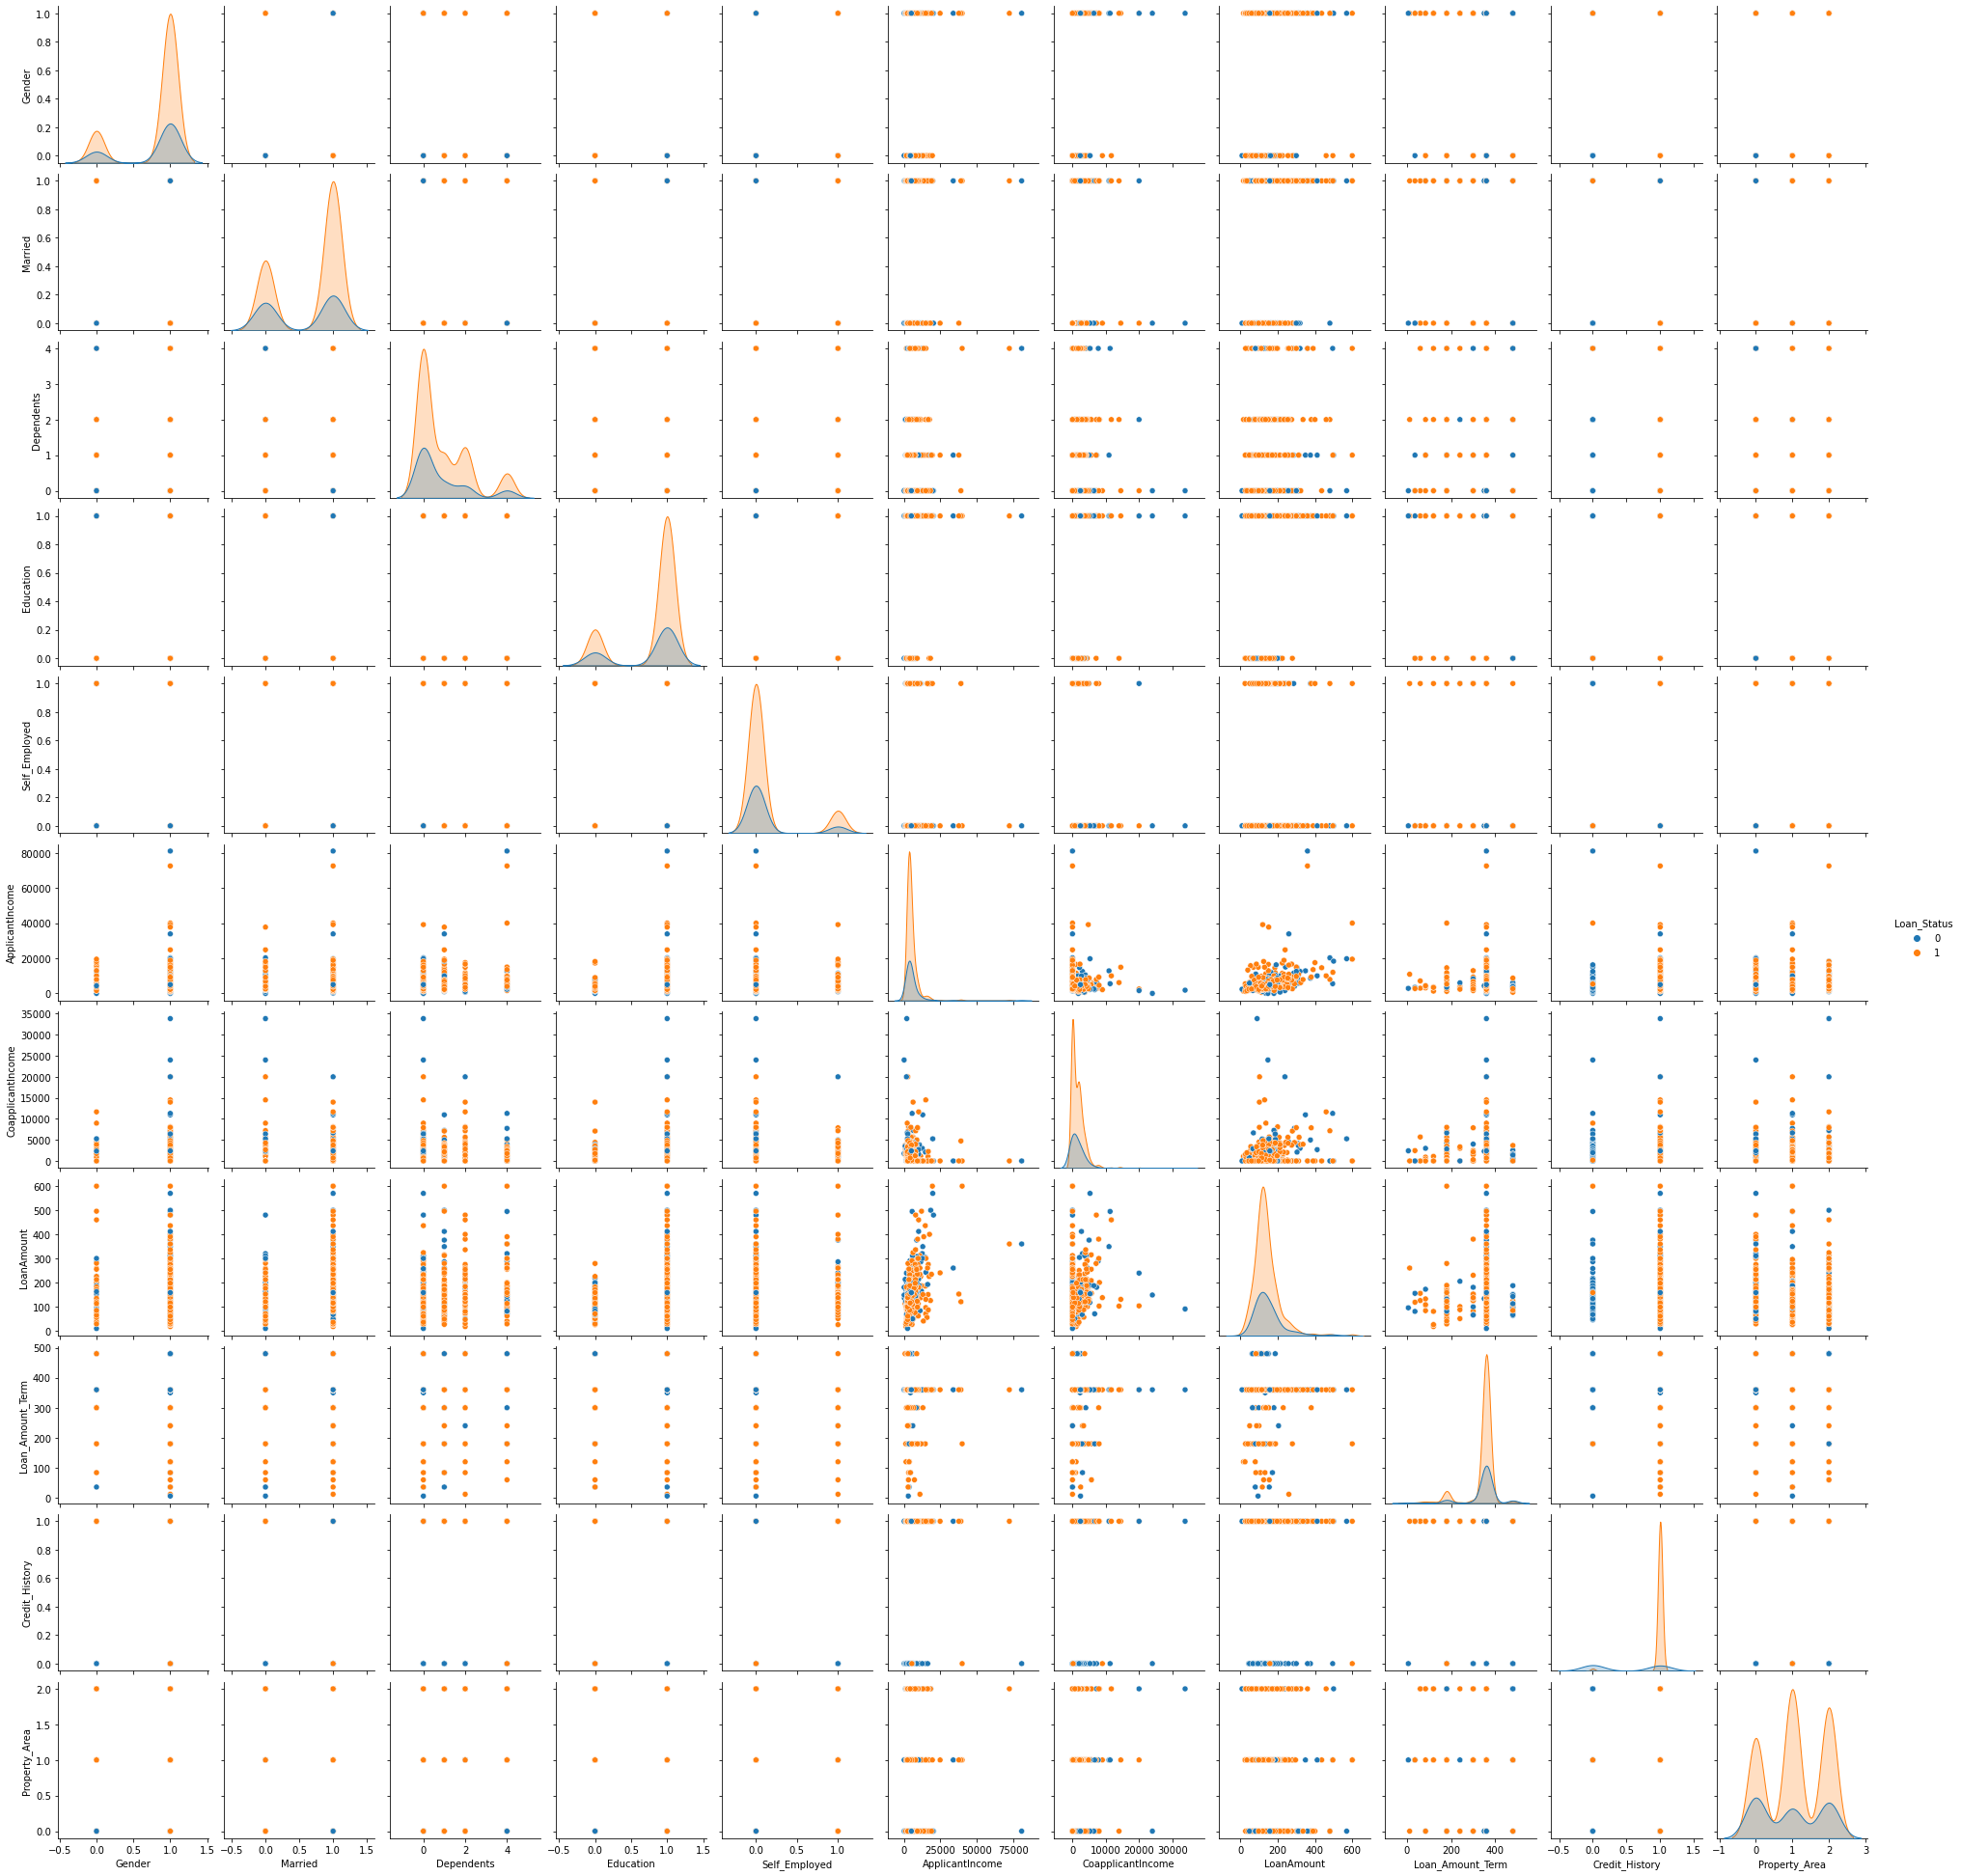

In [277]:

sns.pairplot( data=cr, vars=cr.columns[0:-1],
                             hue='Loan_Status' )

In [311]:
cr_x = cr.iloc[:, 0:-1]
cr_y = cr.iloc[:, -1]

In [312]:
from sklearn.ensemble import RandomForestClassifier

In [313]:
rf = RandomForestClassifier()

In [314]:
rf.fit(cr_x, cr_y)

RandomForestClassifier()

In [315]:
import lime
from lime import lime_tabular

In [316]:
explainer = lime_tabular.LimeTabularExplainer( training_data=np.array(cr_x),
    feature_names=cr_x.columns,
    class_names=['Rejected', 'Approved'],
    mode='classification'
)

In [317]:
cr.head(10)

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1        1        1         1.0          1              0             4583   
2        1        1         0.0          1              1             3000   
3        1        1         0.0          0              0             2583   
4        1        0         0.0          1              0             6000   
5        1        1         2.0          1              1             5417   
6        1        1         0.0          0              0             2333   
7        1        1         4.0          1              0             3036   
8        1        1         2.0          1              0             4006   
9        1        1         1.0          1              0            12841   
10       1        1         2.0          1              0             3200   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1              1508.0       128.0             360.0             1.0   
2                 0.0        66.0             360.0             1.0   
3              2358.0       120.0             360.0             1.0   
4                 0.0       141.0             360.0             1.0   
5              4196.0       267.0             360.0             1.0   
6              1516.0        95.0             360.0             1.0   
7              2504.0       158.0             360.0             0.0   
8              1526.0       168.0             360.0             1.0   
9             10968.0       349.0             360.0             1.0   
10              700.0        70.0             360.0             1.0   

    Property_Area  Loan_Status  
1               0            0  
2               2            1  
3               2            1  
4               2            1  
5               2            1  
6               2            1  
7               1            0  
8               2            1  
9               1            0  
10              2            1

In [318]:
exp = explainer.explain_instance(
    data_row=cr_x.iloc[0], 
    predict_fn=rf.predict_proba
)
 
exp.show_in_notebook(show_table=True)

C:\Users\RahulK\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [319]:
exp = explainer.explain_instance(
    data_row=cr_x.iloc[1], 
    predict_fn=rf.predict_proba
)
 
exp.show_in_notebook(show_table=True)

C:\Users\RahulK\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [303]:
# New data Iris flower

In [222]:
ir = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Supervised\Feature Importance\Iris.csv')

In [223]:
ir.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

<AxesSubplot:>

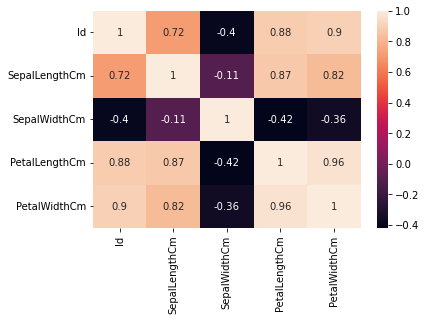

In [231]:
sns.heatmap(ir.corr(), annot= True)

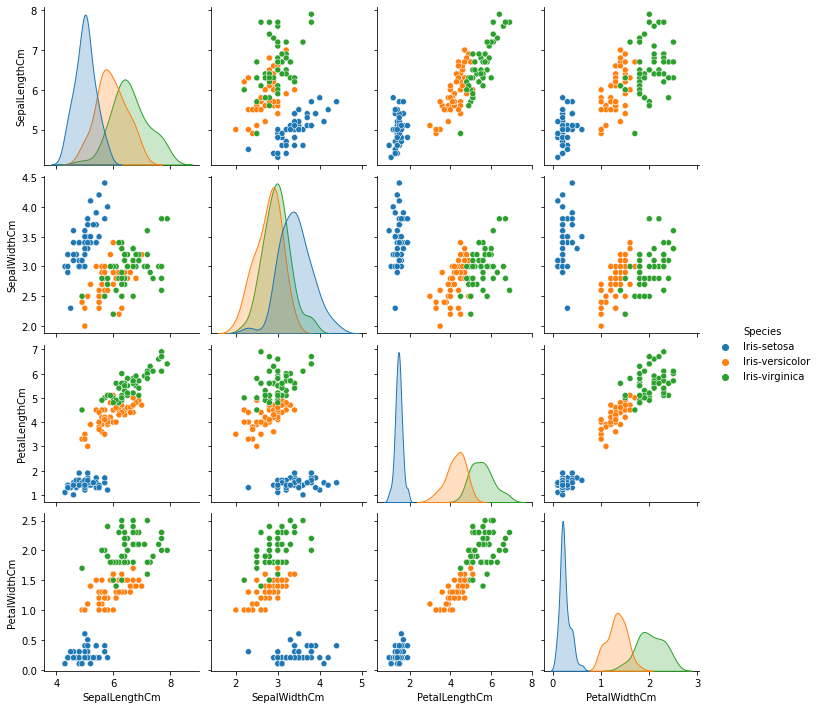

In [232]:
sns.pairplot( data=ir, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'), hue='Species' )

In [233]:
# Lets normalise the data

df_norm = ir[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
72        0.555556      0.208333       0.661017      0.583333
69        0.361111      0.208333       0.491525      0.416667
15        0.388889      1.000000       0.084746      0.125000
1         0.166667      0.416667       0.067797      0.041667
125       0.805556      0.500000       0.847458      0.708333

In [234]:
# In the above, we have separated the target data from the features. 
# For modelling the data we are required to provide numerical labels to the classes presented in the target variable.
target = ir[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
target.sample(5)

Species
93         1
144        2
149        2
100        2
21         0

In [235]:
# After normalizing and labelling the target and features let’s concatenate them again.
df = pd.concat([df_norm, target], axis=1)

In [236]:
train, test = train_test_split(df, test_size = 0.3)
trainX = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
trainY=train.Species
testX= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
testY =test.Species

In [237]:
# After all the preparation we are ready to model the data using a Multilayer Perceptron classifier.

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

In [238]:
clf.fit(trainX, trainY)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1,
              solver='lbfgs')

In [240]:
prediction = clf.predict(testX)

In [241]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,testY))

The accuracy of the Multi-layer Perceptron is: 0.9111111111111111


In [242]:
import lime
from lime import lime_tabular
 


In [243]:
explainer = lime_tabular.LimeTabularExplainer( training_data=np.array(trainX),
    feature_names=trainX.columns,
    class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
    mode='classification'
)

In [247]:
exp = explainer.explain_instance(
    data_row=testX.iloc[1], 
    predict_fn=clf.predict_proba
)
 
exp.show_in_notebook(show_table=True)

C:\Users\RahulK\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
